### 1. Importing libraries
###

In [118]:
import pandas as pd
import seaborn as sns    
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

###
### 2. Reading data from CSV file
###

In [119]:
df=pd.read_csv('Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###
### 3. Checking data information and presence of null values
###

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###
### 4. Splitting data into input and output columns 
###

In [121]:
X=df.iloc[:,:8]
y=df.iloc[:,-1]

###
### 5. Standardizing the data
###

In [122]:
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

###
### 6. Converting standard data(numpy array) into given data frame 
###

In [123]:
X=pd.DataFrame(X_scaled,columns=X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


###
### 7. Creating a Correlation matrix
###

In [124]:
correlation_matrix=X.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


###
### 8. Finding eigen values and eigen vectors
###

In [125]:
eigen_values_corr, eigen_vectors_corr=np.linalg.eig(correlation_matrix)
print(eigen_values_corr)
print()
eigen_vectors_corr

[2.09437995 1.73121014 0.41981618 0.40446205 0.68262839 0.76234439
 0.87552904 1.02962987]



array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282],
       [-0.36000261, -0.18389207, -0.19211793, -0.01129554,  0.6341159 ,
        -0.32795306, -0.05598649,  0.53549442],
       [-0.43982428,  0.33196534,  0.28221253,  0.5662838 , -0.00958944,
         0.48786206, -0.03797608,  0.2376738 ],
       [-0.43502617,  0.25078106, -0.13200992, -0.54862138,  0.27065061,
         0.34693481,  0.34994376, -0.33670893],
       [-0.45194134,  0.1009598 , -0.03536644, -0.34151764, -0.68537218,
        -0.25320376, -0.05364595,  0.36186463],
       [-0.27061144,  0.122069  , -0.08609107, -0.00825873,  0.08578409,
        -0.11981049, -0.8336801 , -0.43318905],
       [-0.19802707, -0.62058853,  0.71208542, -0.21166198,  0.03335717,
         0.10928996, -0.0712006 , -0.07524755]])

###
### 9. Creating covariance matrix just for cross validating the important PCs.
###

In [126]:
covariance_matrix=np.cov([X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],X.iloc[:,3],X.iloc[:,4],X.iloc[:,5],X.iloc[:,6],X.iloc[:,7]])
covariance_matrix

array([[ 1.00130378,  0.12962746,  0.14146618, -0.08177826, -0.07363049,
         0.01770615, -0.03356638,  0.54505093],
       [ 0.12962746,  1.00130378,  0.15278853,  0.05740263,  0.33178913,
         0.2213593 ,  0.13751636,  0.26385788],
       [ 0.14146618,  0.15278853,  1.00130378,  0.2076409 ,  0.08904933,
         0.2821727 ,  0.04131875,  0.23984024],
       [-0.08177826,  0.05740263,  0.2076409 ,  1.00130378,  0.43735204,
         0.39308503,  0.18416737, -0.11411885],
       [-0.07363049,  0.33178913,  0.08904933,  0.43735204,  1.00130378,
         0.19811702,  0.18531222, -0.04221793],
       [ 0.01770615,  0.2213593 ,  0.2821727 ,  0.39308503,  0.19811702,
         1.00130378,  0.14083033,  0.03628912],
       [-0.03356638,  0.13751636,  0.04131875,  0.18416737,  0.18531222,
         0.14083033,  1.00130378,  0.03360507],
       [ 0.54505093,  0.26385788,  0.23984024, -0.11411885, -0.04221793,
         0.03628912,  0.03360507,  1.00130378]])

In [127]:
eigen_values_cov, eigen_vectors_cov=np.linalg.eig(covariance_matrix)
print(eigen_values_cov)
print()
eigen_vectors_cov

[2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]



array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282],
       [-0.36000261, -0.18389207, -0.19211793, -0.01129554,  0.6341159 ,
        -0.32795306, -0.05598649,  0.53549442],
       [-0.43982428,  0.33196534,  0.28221253,  0.5662838 , -0.00958944,
         0.48786206, -0.03797608,  0.2376738 ],
       [-0.43502617,  0.25078106, -0.13200992, -0.54862138,  0.27065061,
         0.34693481,  0.34994376, -0.33670893],
       [-0.45194134,  0.1009598 , -0.03536644, -0.34151764, -0.68537218,
        -0.25320376, -0.05364595,  0.36186463],
       [-0.27061144,  0.122069  , -0.08609107, -0.00825873,  0.08578409,
        -0.11981049, -0.8336801 , -0.43318905],
       [-0.19802707, -0.62058853,  0.71208542, -0.21166198,  0.03335717,
         0.10928996, -0.0712006 , -0.07524755]])

###
### 10. Creating new DataFrame with top two principal components and outcomes using eigen values and eigen vectors.
###

In [128]:
pc=eigen_vectors_corr[:2]
pc

array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282]])

In [129]:
transformed_df=np.dot(X,pc.T)

new_df=pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['Outcome']=y
new_df.head()

,PC1,PC2,Outcome
0,-0.355075,-0.507317,1
1,0.768246,1.102389,0
2,-1.749747,-0.514054,1
3,0.615796,0.918929,0
4,0.919575,2.358007,1


###
### 11. Plotting scatter plot
###

<Axes: xlabel='PC1', ylabel='PC2'>

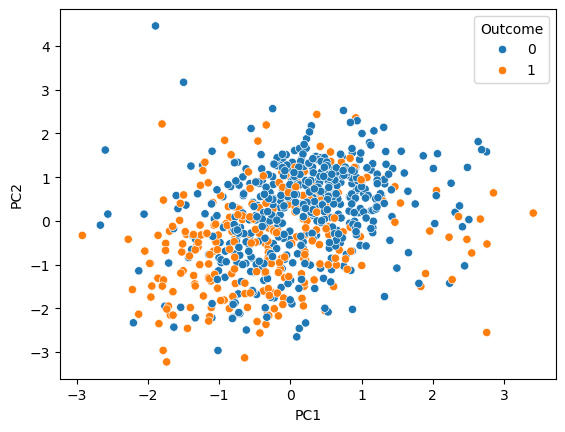

In [130]:
sns.scatterplot(x=new_df['PC1'],
                y=new_df['PC2'],
                hue=new_df['Outcome'],
                color='blue')

###
### 11. Plotting scatter plot using "plotly" for better visual representation
###

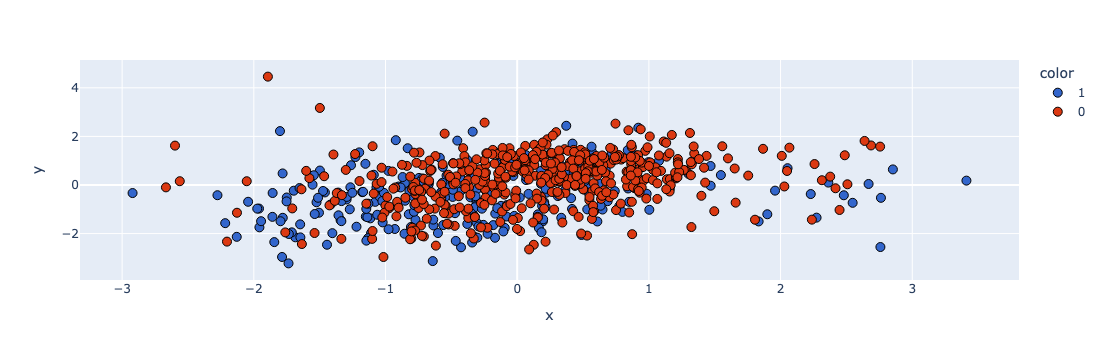

In [131]:
import plotly.express as px

new_df['Outcome']=new_df['Outcome'].astype('str')
fig=px.scatter(x=new_df['PC1'],
               y=new_df['PC2'],
               color=new_df['Outcome'],
               color_discrete_sequence=px.colors.qualitative.G10)
fig.update_traces(marker=dict(size=9,
                             line=dict(width=1,
                                      color='black')),
                 selector=dict(mode='markers'))
fig.show()

###
### 12. New DataFrame
###

In [178]:
new_df

,PC1,PC2,Outcome
0,-0.355075,-0.507317,1
1,0.768246,1.102389,0
2,-1.749747,-0.514054,1
3,0.615796,0.918929,0
4,0.919575,2.358007,1
...,...,...,...
763,0.120911,-1.543602,0
764,0.519900,0.257321,0
765,-0.468015,0.093703,0
766,0.204155,-0.768136,1


###
### 13. Dividing data into input and output columns
###

In [292]:
X_new=new_df.iloc[:,:2]
y_new=new_df.iloc[:,-1]

###
### 14. Converting DataFrame into numpy arrays for easy calculation later
###

In [316]:
X_new=np.array(X_new)
y_new=np.array(y_new).astype(int)


###
### 15. Dividing data into training and testing sets
###

In [334]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=99)


###
### 16. Importing important libraries
###

In [335]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

###
### 17. Function for implementing Least Square Classifier
###

In [336]:
# Least Squares Classifier
class LeastSquaresClassifier:
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # Append a bias term for intercept inclusion (column of ones)
        X_bias = np.c_[np.ones(X.shape[0]), X]
        
        # Solve for weights using the normal equation: w = (X.T X)^(-1) X.T y
        self.weights = np.linalg.pinv(X_bias.T @ X_bias) @ X_bias.T @ y
    
    def predict(self, X):
        # Append a bias term (column of ones)
        X_bias = np.c_[np.ones(X.shape[0]), X]
        
        # Predict labels
        predictions = X_bias @ self.weights
        
        # Convert predictions to 0 or 1
        return np.where(predictions >= 0.5, 1, 0)




###
### 18. Train the model
###

In [337]:
model = LeastSquaresClassifier()
model.fit(X_train, y_train)

###
### 19. Make predictions
###

In [338]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

###
### 20. Checking accuracy of the model
###

In [339]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 68.40%
Testing Accuracy: 75.32%
